# Problem Definition

In this project,we will use the machine learning models to predict the final number of elected MP's results of the 2019 Portuguese Parliamentary Election.

1. importing the data
2. cleaning and preparing the data
3. exploring and visualizing the data
4. adding new features
5. splitting dataset into train_set and test_set
6. selecting error metric: mean absolute error vs mean squared error
7. Using varous algorithms:

    a. LinearRegression
    b. Lasso
    c. KNeighborsRegressor
    d. AdaBoostRegressor
    e. DecisionTreeRegressor
8. Using GridSearchCV for best parameter
9. Using r2score for best value
10. Find the cross val score

# Importing packages

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib
warnings.filterwarnings('ignore')
from sklearn.preprocessing import  minmax_scale

# Uploding Dataset

In [2]:
ds=pd.read_csv('ElectionData.csv')

# Exploratory Data Analysis

Read Dataset

In [3]:
#printing the shape of dataframes
ds.shape

(21643, 28)

In [4]:
#find the first five rows
ds.head()

TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   
1            0  2019-10-06 20:10:02  Território Nacional              0   
2            0  2019-10-06 20:10:02  Território Nacional              0   
3            0  2019-10-06 20:10:02  Território Nacional              0   
4            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66   
1                   2.5       8874  ...                 52.66   
2                   2.5       8874  ...                 52.66   
3                   2.5       8874  ...                 52.66   
4                   2.5       8874  ...                 52.66   

   pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                813743           428546       PS         0       38.29   
1                813743           428546  PPD/PSD         0       33.28   
2                813743           428546     B.E.         0        6.81   
3                813743           428546   CDS-PP         0        4.90   
4                813743           428546  PCP-PEV         0        4.59   

   validVotesPercentage   Votes  Hondt  FinalMandates  
0                 40.22  147993     94            106  
1                 34.95  128624     81             77  
2                  7.15   26307     16             19  
3                  5.14   18923     12              5  
4                  4.83   17757     11             12  

[5 rows x 28 columns]

In [5]:
#find the last row of dataframe
ds.tail()

TimeElapsed                 time territoryName  totalMandates  \
21638          265  2019-10-07 00:35:01         Viseu              8   
21639          265  2019-10-07 00:35:01         Viseu              8   
21640          265  2019-10-07 00:35:01         Viseu              8   
21641          265  2019-10-07 00:35:01         Viseu              8   
21642          265  2019-10-07 00:35:01         Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters  Party  Mandates  Percentage  \
21638                371931           190712     NC         0        0.19   
21639                371931           190712    PNR         0        0.18   
21640                371931           190712    MPT         0        0.14   
21641                371931           190712    PTP         0        0.13   
21642                371931           190712    JPP         0        0.07   

       validVotesPercentage  Votes  Hondt  FinalMandates  
21638                  0.20    332      0              0  
21639                  0.19    326      0              0  
21640                  0.15    256      0              0  
21641                  0.14    239      0              0  
21642                  0.07    118      0              0  

[5 rows x 28 columns]

In [6]:
#To get the columns name 
ds.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [7]:
#get the complete details of columns data
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
TimeElapsed                 21643 non-null int64
time                        21643 non-null object
territoryName               21643 non-null object
totalMandates               21643 non-null int64
availableMandates           21643 non-null int64
numParishes                 21643 non-null int64
numParishesApproved         21643 non-null int64
blankVotes                  21643 non-null int64
blankVotesPercentage        21643 non-null float64
nullVotes                   21643 non-null int64
nullVotesPercentage         21643 non-null float64
votersPercentage            21643 non-null float64
subscribedVoters            21643 non-null int64
totalVoters                 21643 non-null int64
pre.blankVotes              21643 non-null int64
pre.blankVotesPercentage    21643 non-null float64
pre.nullVotes               21643 non-null int64
pre.nullVotesPercentage     21643 non-null float

In [8]:
#to get the dataframe
ds.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [9]:
#describe dataframe
ds.describe()

TimeElapsed  totalMandates  availableMandates   numParishes  \
count  21643.000000   21643.000000       21643.000000  21643.000000   
mean     133.146052      11.544795          11.499284    309.956013   
std       77.651193      31.314567          31.738783    659.055911   
min        0.000000       0.000000           0.000000     54.000000   
25%       65.000000       1.000000           0.000000     75.000000   
50%      135.000000       4.000000           3.000000    147.000000   
75%      200.000000       9.000000           9.000000    242.000000   
max      265.000000     226.000000         226.000000   3092.000000   

       numParishesApproved     blankVotes  blankVotesPercentage     nullVotes  \
count         21643.000000   21643.000000          21643.000000  21643.000000   
mean            261.090237    8875.066673              2.621629   6148.068752   
std             583.377428   21484.874088              0.795289  14735.469269   
min               3.000000      19.000000              0.530000     39.000000   
25%              67.000000    1188.000000              2.230000   1094.000000   
50%             120.000000    2998.000000              2.640000   2232.000000   
75%             208.000000    6889.000000              2.980000   4121.000000   
max            3092.000000  129599.000000              5.460000  88539.000000   

       nullVotesPercentage  votersPercentage  ...  pre.nullVotesPercentage  \
count         21643.000000      21643.000000  ...             21643.000000   
mean              1.961471         51.983722  ...                 1.777442   
std               0.375250          4.854380  ...                 0.388798   
min               1.340000         35.980000  ...                 1.140000   
25%               1.720000         50.290000  ...                 1.520000   
50%               1.870000         53.130000  ...                 1.690000   
75%               2.230000         54.550000  ...                 1.970000   
max               3.350000         59.870000  ...                 3.120000   

       pre.votersPercentage  pre.subscribedVoters  pre.totalVoters  \
count          21643.000000          2.164300e+04     2.164300e+04   
mean              54.549372          6.378503e+05     3.594932e+05   
std                4.964948          1.544418e+06     8.763729e+05   
min               40.870000          6.383000e+03     3.215000e+03   
25%               51.210000          1.289260e+05     6.964400e+04   
50%               56.260000          2.284970e+05     1.102730e+05   
75%               58.220000          3.933140e+05     2.276200e+05   
max               62.580000          9.439701e+06     5.380451e+06   

           Mandates    Percentage  validVotesPercentage         Votes  \
count  21643.000000  21643.000000          21643.000000  2.164300e+04   
mean       0.565495      4.968484              5.207232  1.585209e+04   
std        4.421804     10.379967             10.881108  9.310605e+04   
min        0.000000      0.020000              0.020000  1.000000e+00   
25%        0.000000      0.220000              0.230000  2.360000e+02   
50%        0.000000      0.620000              0.650000  7.900000e+02   
75%        0.000000      3.010000              3.160000  4.510000e+03   
max      106.000000     49.110000             51.420000  1.866407e+06   

              Hondt  FinalMandates  
count  21643.000000   21643.000000  
mean       1.126138       1.126138  
std        6.293552       6.872644  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max       94.000000     106.000000  

[8 rows x 25 columns]

In [10]:
#checking null velues
ds.isna()

TimeElapsed   time  territoryName  totalMandates  availableMandates  \
0            False  False          False          False              False   
1            False  False          False          False              False   
2            False  False          False          False              False   
3            False  False          False          False              False   
4            False  False          False          False              False   
...            ...    ...            ...            ...                ...   
21638        False  False          False          False              False   
21639        False  False          False          False              False   
21640        False  False          False          False              False   
21641        False  False          False          False              False   
21642        False  False          False          False              False   

       numParishes  numParishesApproved  blankVotes  blankVotesPercentage  \
0            False                False       False                 False   
1            False                False       False                 False   
2            False                False       False                 False   
3            False                False       False                 False   
4            False                False       False                 False   
...            ...                  ...         ...                   ...   
21638        False                False       False                 False   
21639        False                False       False                 False   
21640        False                False       False                 False   
21641        False                False       False                 False   
21642        False                False       False                 False   

       nullVotes  ...  pre.votersPercentage  pre.subscribedVoters  \
0          False  ...                 False                 False   
1          False  ...                 False                 False   
2          False  ...                 False                 False   
3          False  ...                 False                 False   
4          False  ...                 False                 False   
...          ...  ...                   ...                   ...   
21638      False  ...                 False                 False   
21639      False  ...                 False                 False   
21640      False  ...                 False                 False   
21641      False  ...                 False                 False   
21642      False  ...                 False                 False   

       pre.totalVoters  Party  Mandates  Percentage  validVotesPercentage  \
0                False  False     False       False                 False   
1                False  False     False       False                 False   
2                False  False     False       False                 False   
3                False  False     False       False                 False   
4                False  False     False       False                 False   
...                ...    ...       ...         ...                   ...   
21638            False  False     False       False                 False   
21639            False  False     False       False                 False   
21640            False  False     False       False                 False   
21641            False  False     False       False                 False   
21642            False  False     False       False                 False   

       Votes  Hondt  FinalMandates  
0      False  False          False  
1      False  False          False  
2      False  False          False  
3      False  False          False  
4      False  False          False  
...      ...    ...            ...  
21638  False  False          False  
21639  False  False          False  
21640  False  False          False  
21641  False  False  

In [11]:
#Checking null value of dataset
ds.isna().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

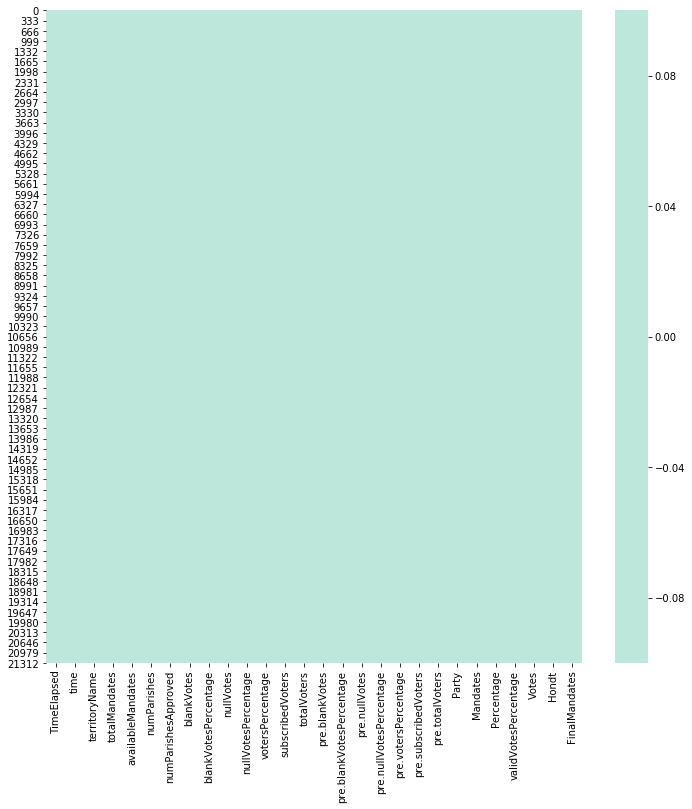

In [13]:
#Checking null value from heatmap
plt.figure(figsize=(12,12))
sns.heatmap(ds.isna(),center=0)

# data manipulation and visualization

In [14]:
ds.Party.unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [15]:
plt.figure(figsize=(12,12))
sns.countplot(ds.Party)

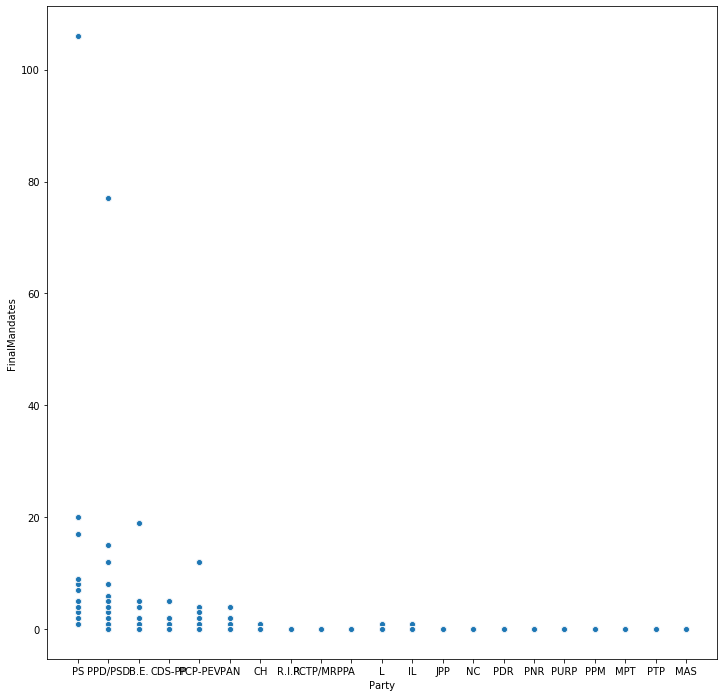

In [16]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Party',y='FinalMandates',data=ds)

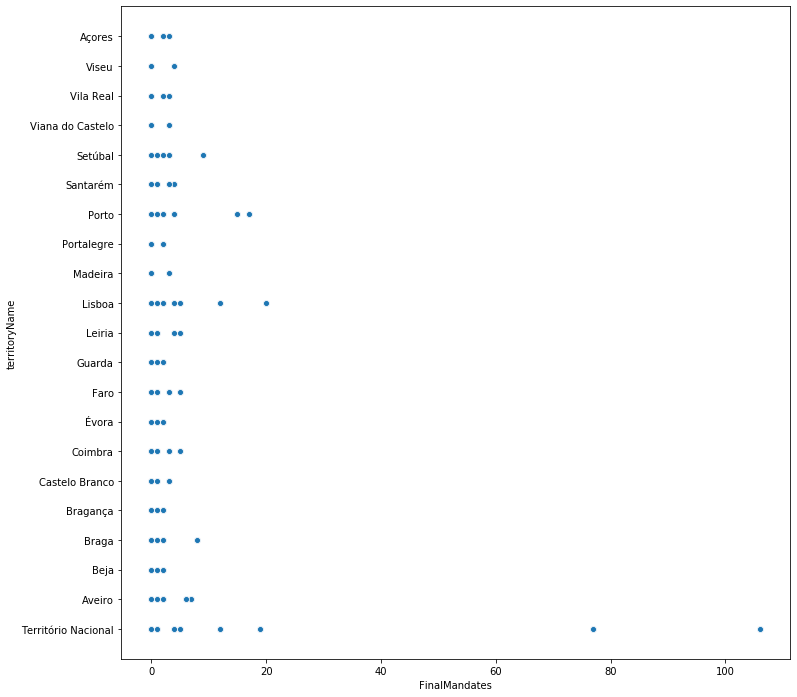

In [17]:
plt.figure(figsize=(12,12))
sns.scatterplot(y='territoryName',x='FinalMandates',data=ds)

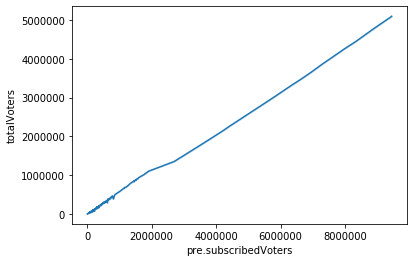

In [18]:
sns.lineplot(y='totalVoters',x='pre.subscribedVoters',data=ds)

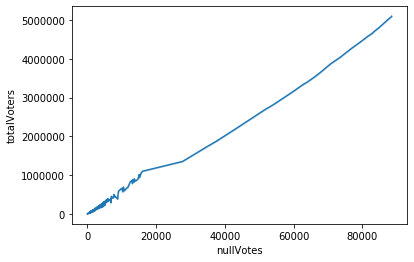

In [19]:
sns.lineplot(y='totalVoters',x='nullVotes',data=ds)

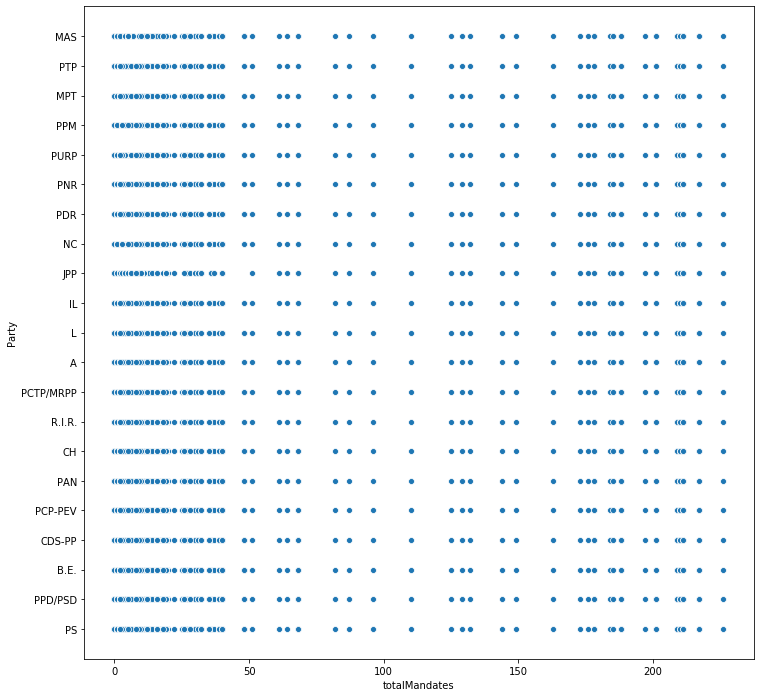

In [20]:
plt.figure(figsize=(12,12))
sns.scatterplot(y='Party',x='totalMandates',data=ds)

In [21]:
ds['ds_day']=pd.to_datetime(ds['time'], dayfirst=False).dt.day
ds['ds_month']=pd.to_datetime(ds['time'], dayfirst=False).dt.month
ds['ds_hh']=pd.to_datetime(ds['time']).dt.hour
ds['ds_mm']=pd.to_datetime(ds['time']).dt.minute
ds['ds_ss']=pd.to_datetime(ds['time']).dt.second

Convert the Time into int

In [23]:
#Droping the columns
ds.drop(['TimeElapsed', 'time'],axis=1,inplace=True)

In [24]:
le=LabelEncoder()
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i] =le.fit_transform(ds[i])   

Use LabelEncoder to change object to int data type

territoryName




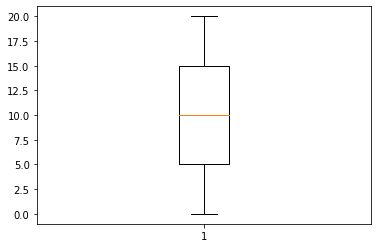

totalMandates




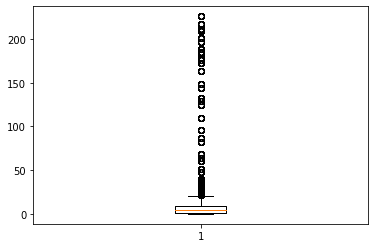

availableMandates




numParishes




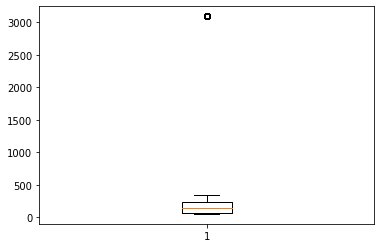

numParishesApproved




blankVotes




blankVotesPercentage




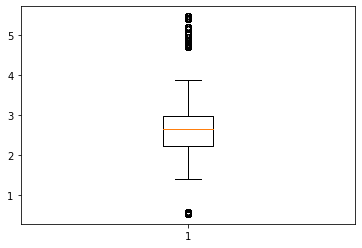

nullVotes




nullVotesPercentage




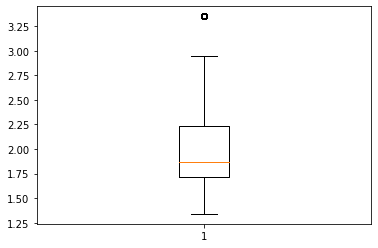

votersPercentage




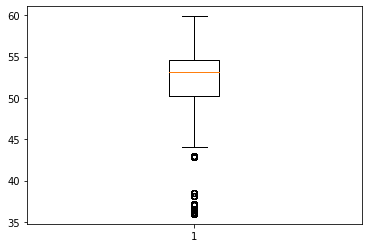

subscribedVoters




totalVoters




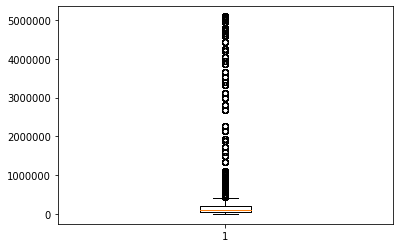

pre.blankVotes




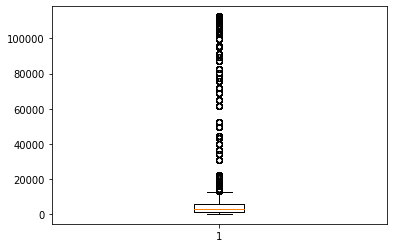

pre.blankVotesPercentage




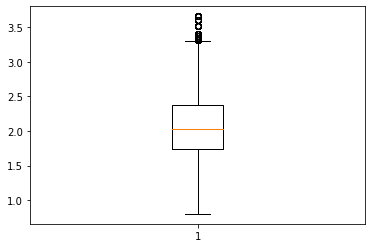

pre.nullVotes




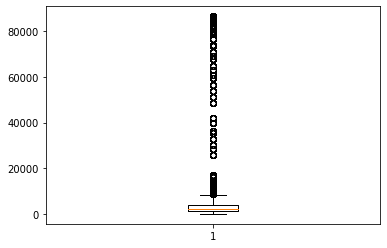

pre.nullVotesPercentage




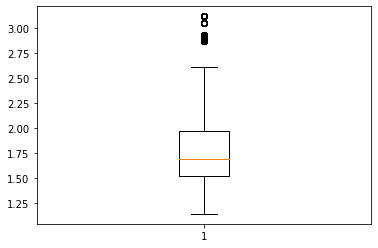

pre.votersPercentage




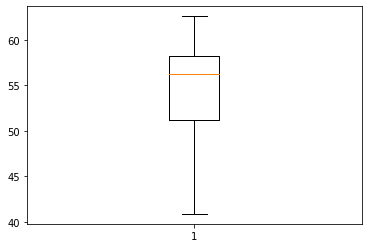

pre.subscribedVoters




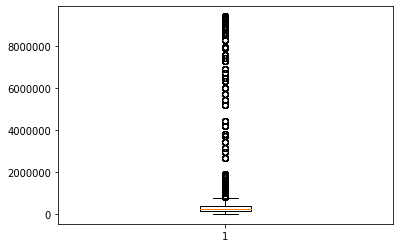

pre.totalVoters




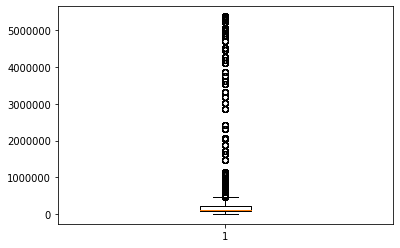

Party




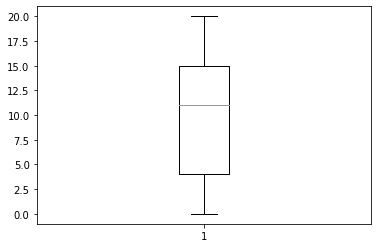

Mandates




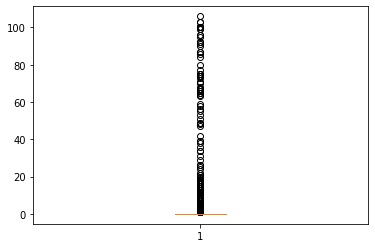

Percentage




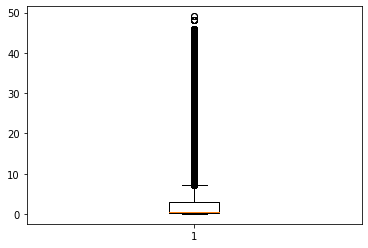

validVotesPercentage




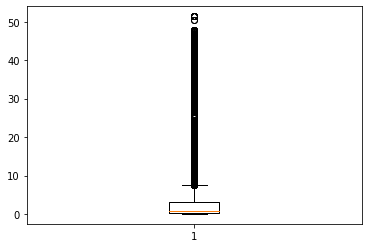

Votes




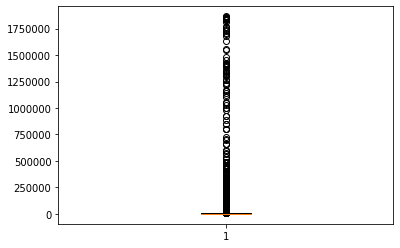

Hondt




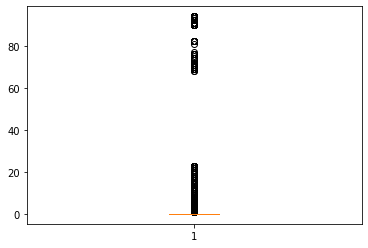

FinalMandates




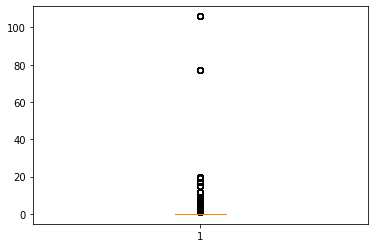

ds_day




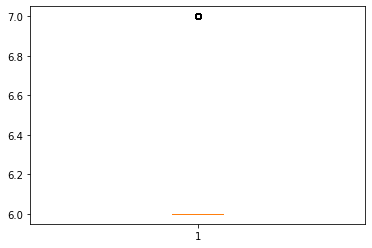

ds_month




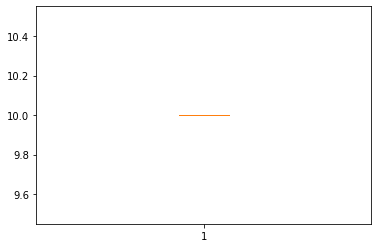

ds_hh




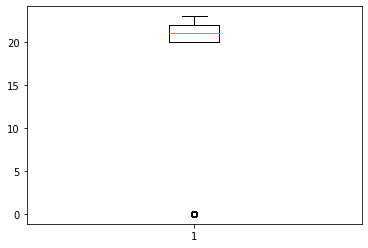

ds_mm




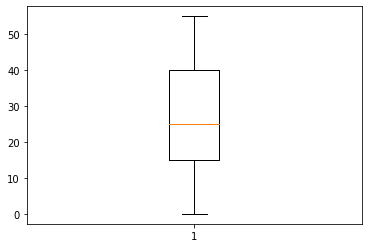

ds_ss




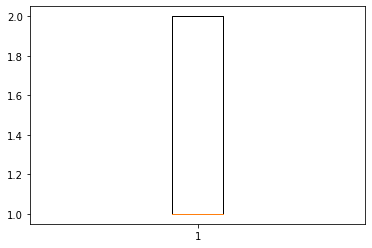

In [26]:
for i in ds.columns:
    plt.boxplot(ds[i])
    print(i)
    print('\n')
    plt.show()

territoryName




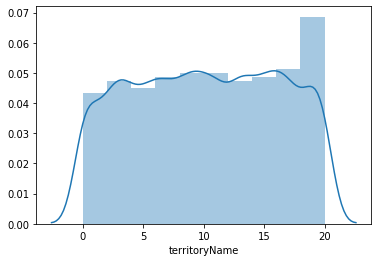

totalMandates




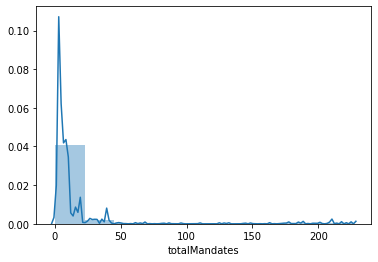

availableMandates




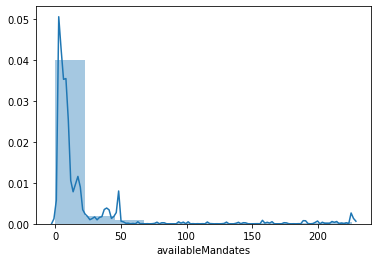

numParishes




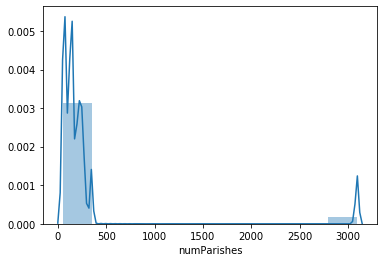

numParishesApproved




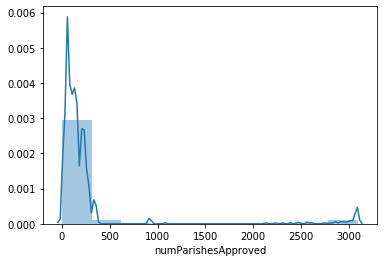

blankVotes




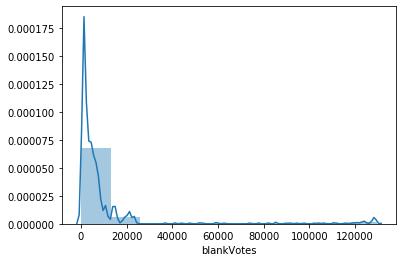

blankVotesPercentage




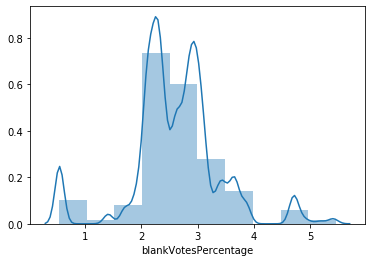

nullVotes




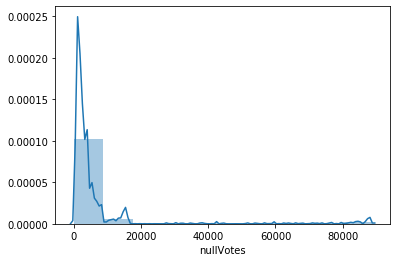

nullVotesPercentage




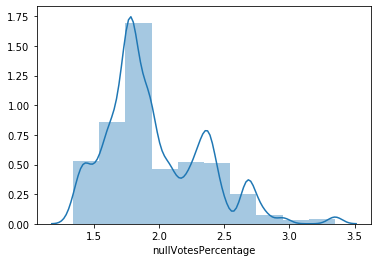

votersPercentage




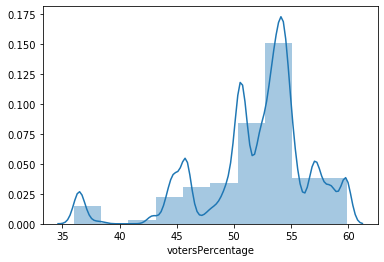

subscribedVoters




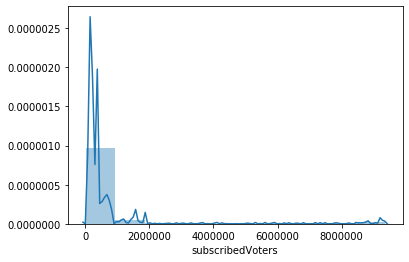

totalVoters




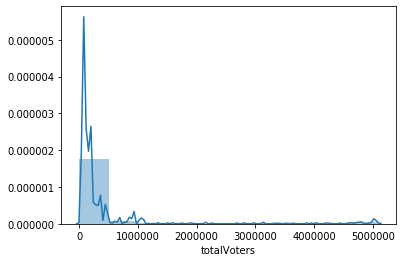

pre.blankVotes




pre.blankVotesPercentage




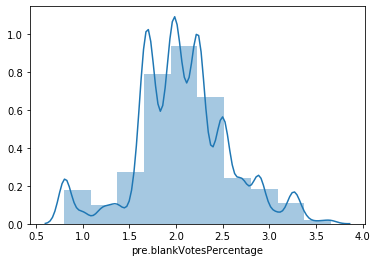

pre.nullVotes




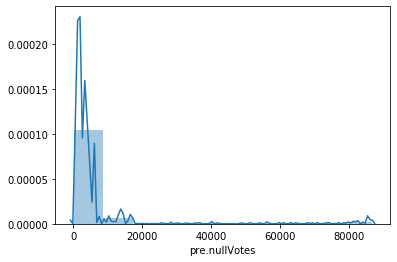

pre.nullVotesPercentage




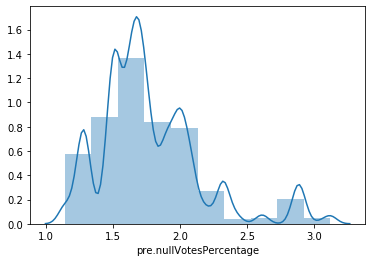

pre.votersPercentage




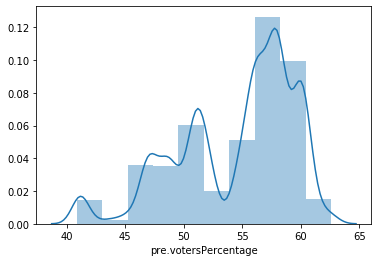

pre.subscribedVoters




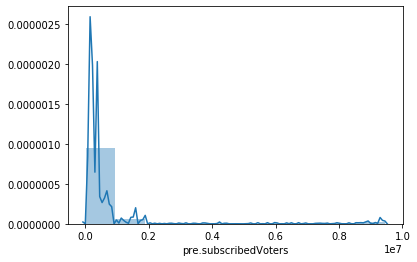

pre.totalVoters




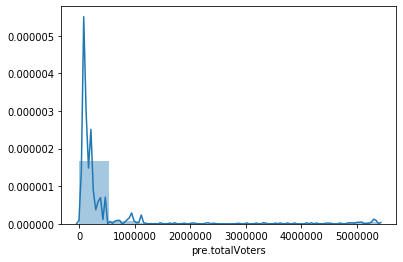

Party




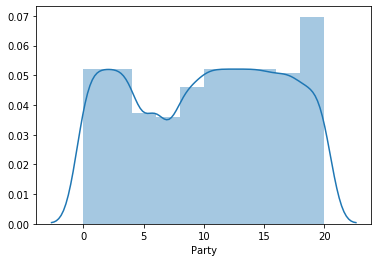

Mandates




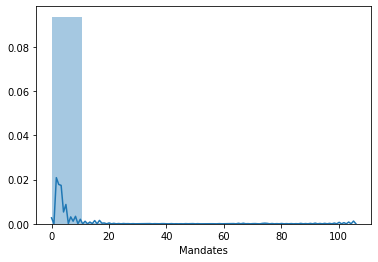

Percentage




validVotesPercentage




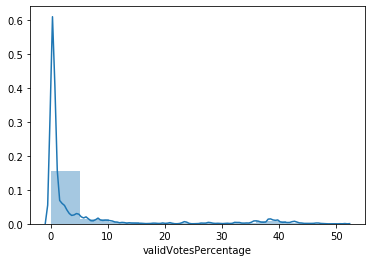

Votes




Hondt




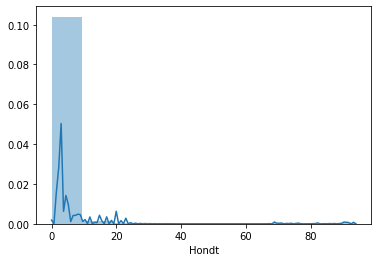

FinalMandates




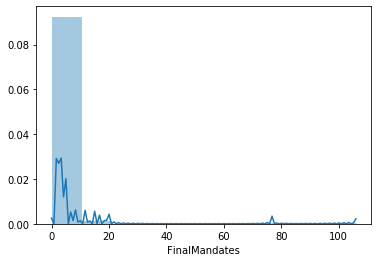

ds_day




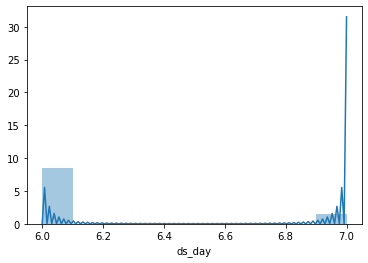

ds_month




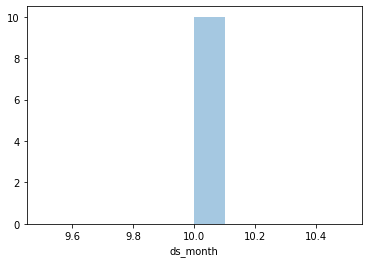

ds_hh




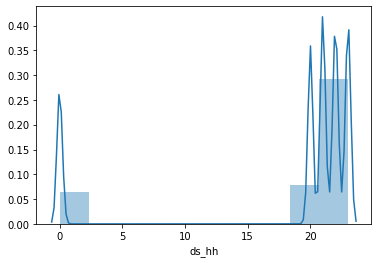

ds_mm




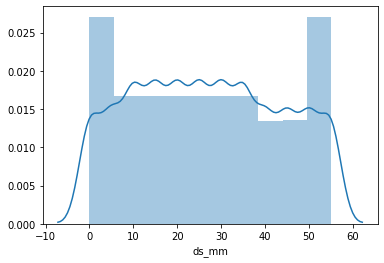

ds_ss




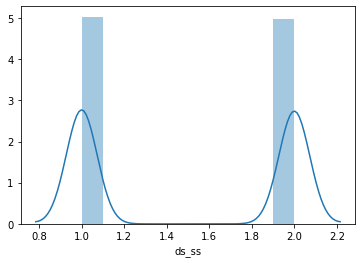

In [27]:
for i in ds.columns:
    print(i)
    sns.distplot(ds[i],bins=10)
    print('\n')
    plt.show()

Checking the distribution of columns data, we found there is uneven skewness of diffrent columns like:

according to the graph we have found many columns data are alleviating and deteriorating.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8F884FC08>,
      dtype=object)

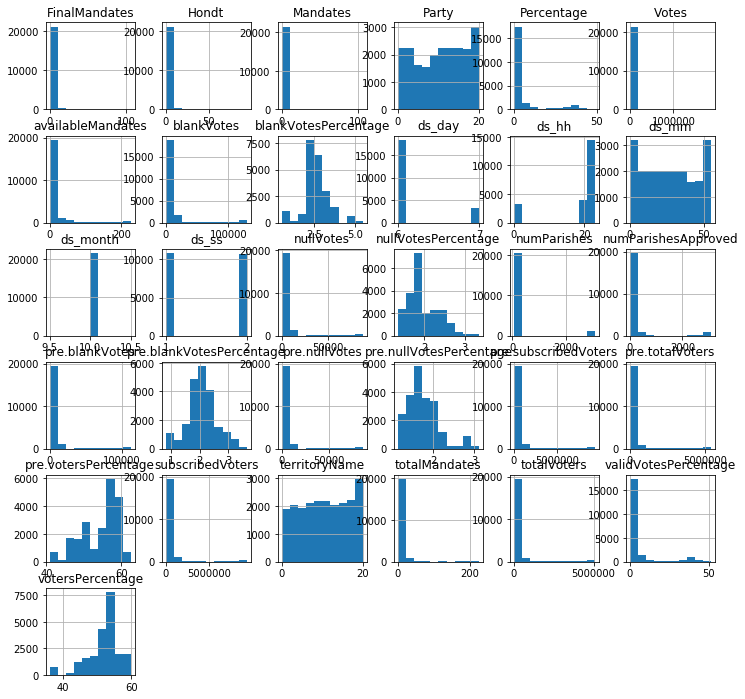

In [28]:
ds.hist(figsize=(12,12))

Using hist plot to visualize each columns distribution

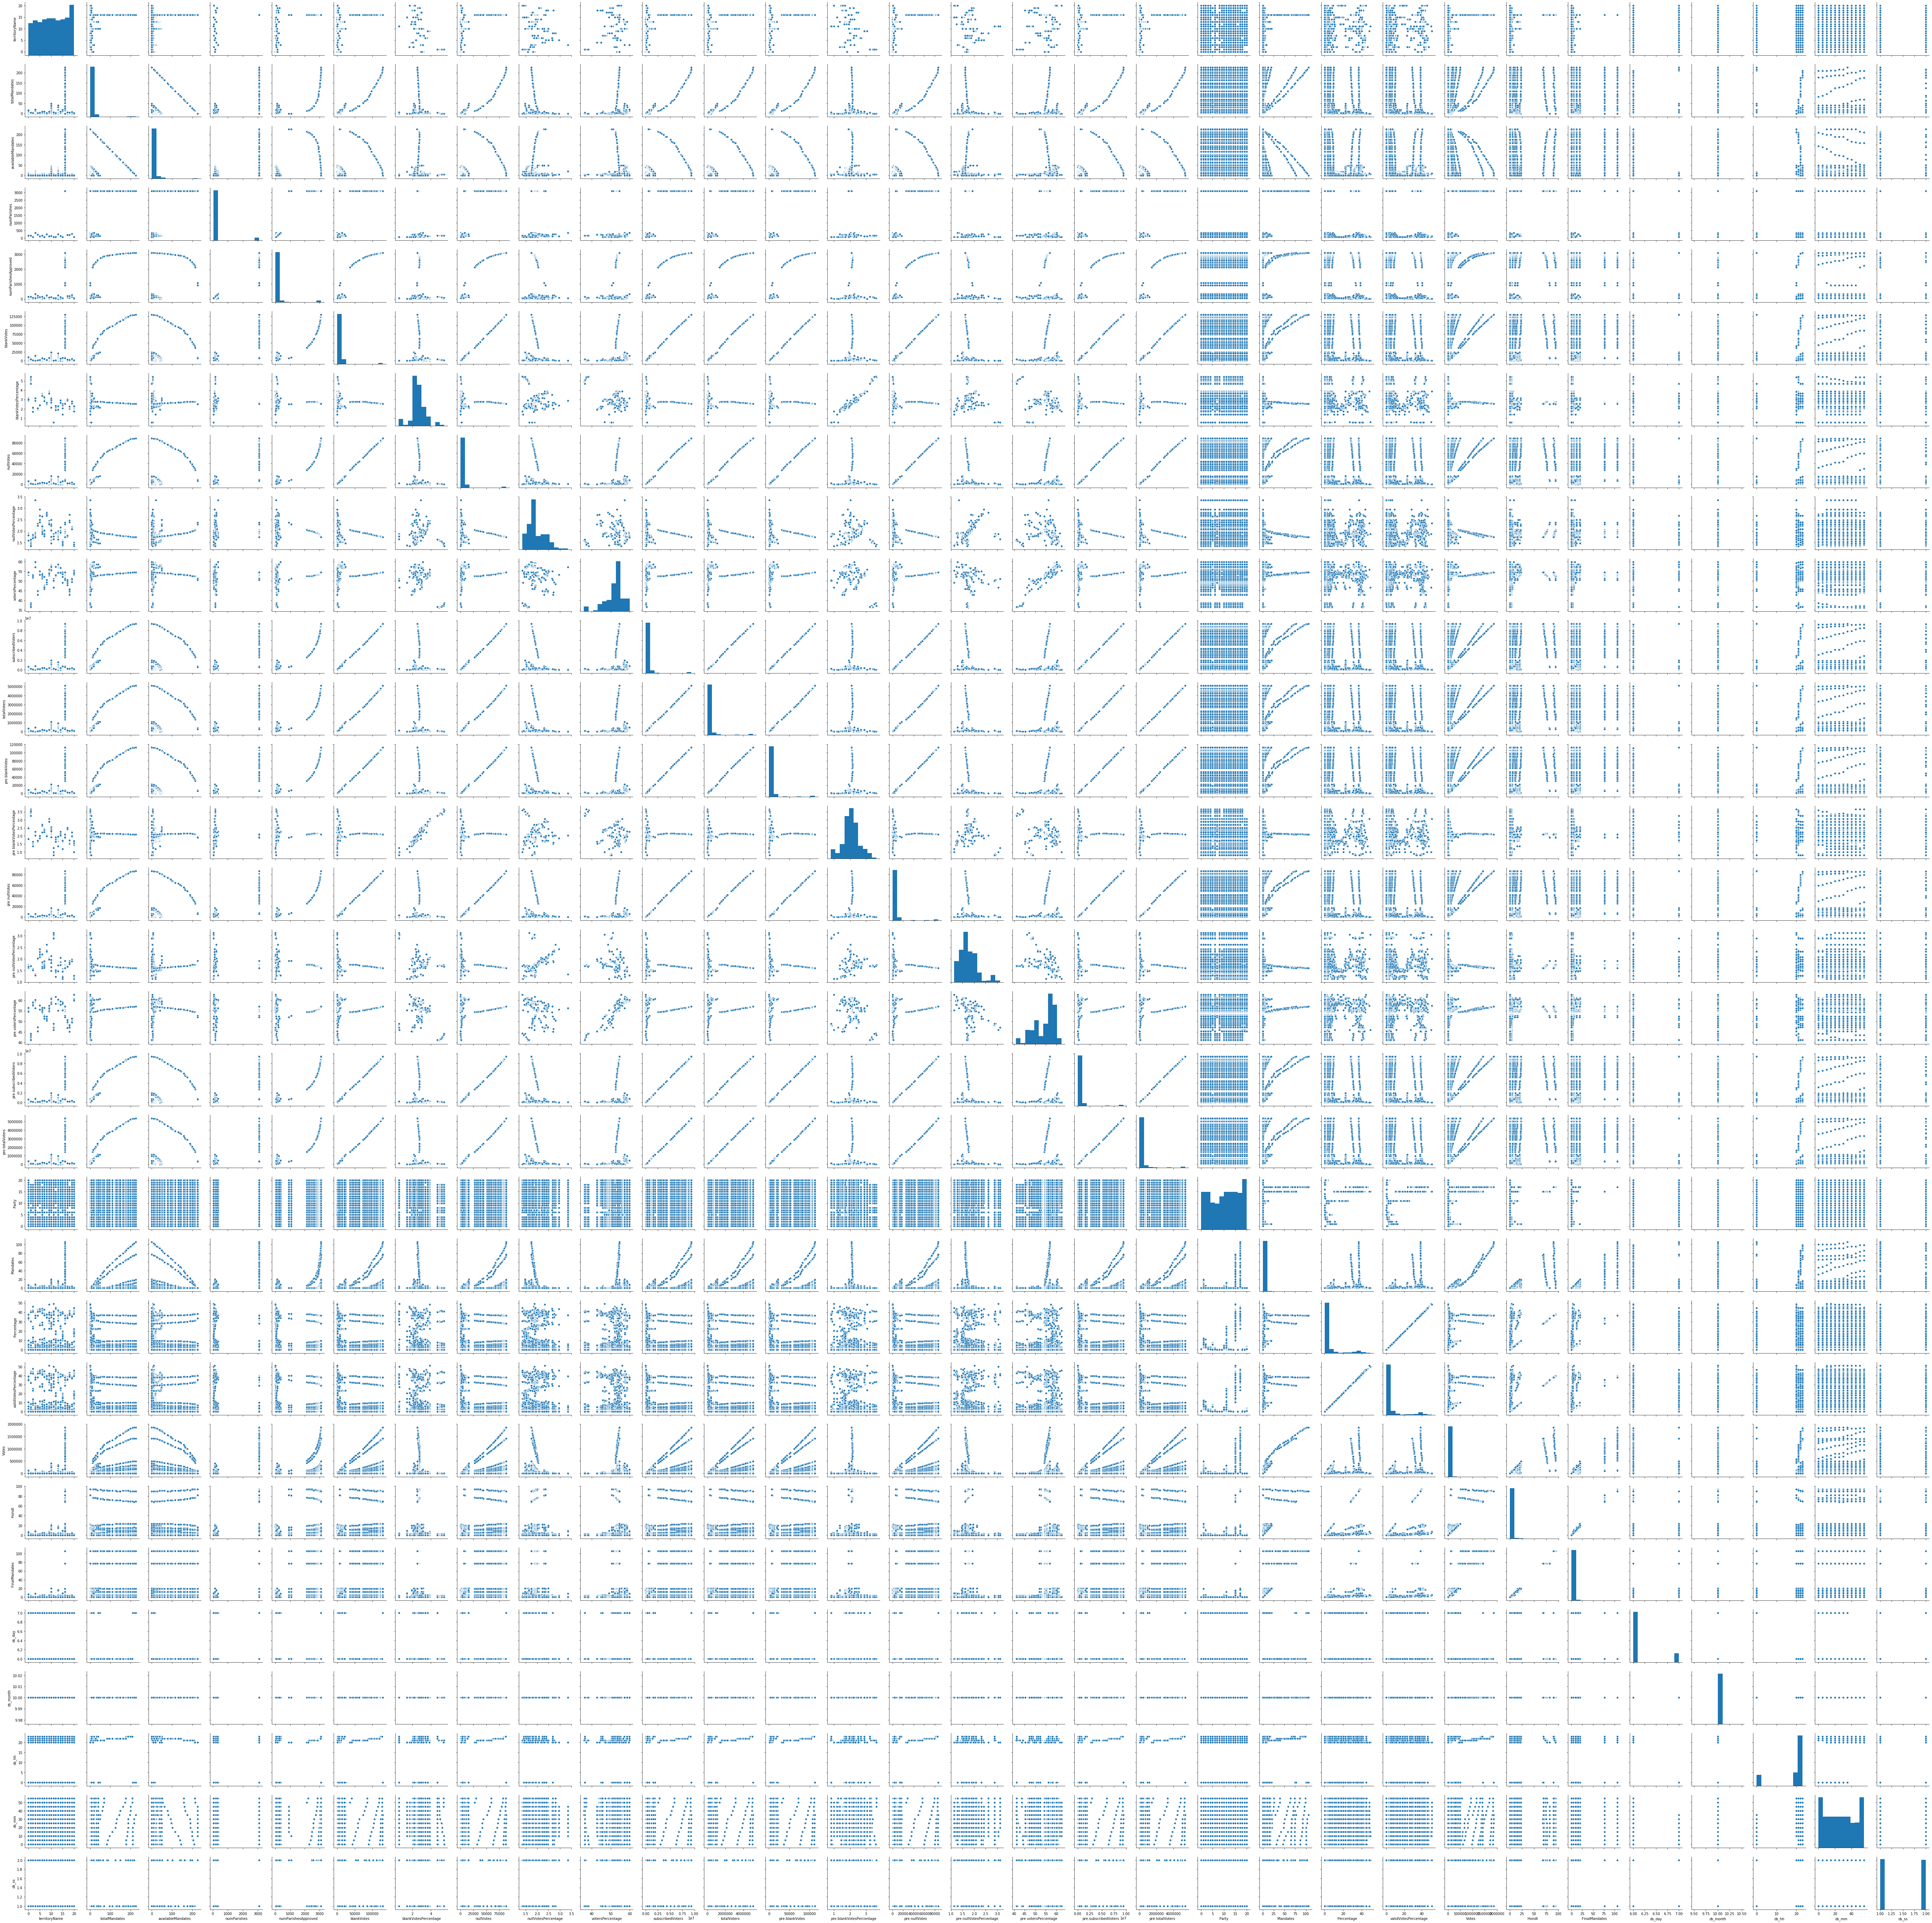

In [29]:
sns.pairplot(ds)

Checking distribution of column and relationship between others

In [30]:
#Check the correlation of data
ds.corr()

territoryName  totalMandates  availableMandates  \
territoryName                  1.000000       0.172374           0.181563   
totalMandates                  0.172374       1.000000           0.217404   
availableMandates              0.181563       0.217404           1.000000   
numParishes                    0.223300       0.765877           0.745472   
numParishesApproved            0.215599       0.873415           0.562719   
blankVotes                     0.178082       0.969988           0.390638   
blankVotesPercentage          -0.302412      -0.003149          -0.002806   
nullVotes                      0.196554       0.967294           0.407366   
nullVotesPercentage           -0.126432      -0.165132           0.029915   
votersPercentage               0.104222       0.171317           0.112293   
subscribedVoters               0.195483       0.974407           0.385828   
totalVoters                    0.193847       0.976336           0.379093   
pre.blankVotes                 0.182412       0.973357           0.383877   
pre.blankVotesPercentage      -0.288817       0.034774          -0.008966   
pre.nullVotes                  0.200393       0.969992           0.399074   
pre.nullVotesPercentage       -0.083214      -0.132143          -0.044174   
pre.votersPercentage           0.078855       0.151927           0.080524   
pre.subscribedVoters           0.196979       0.972976           0.391272   
pre.totalVoters                0.195102       0.975404           0.383089   
Party                          0.012263      -0.003111          -0.001882   
Mandates                       0.057823       0.336989           0.072320   
Percentage                    -0.003433      -0.010171          -0.011083   
validVotesPercentage          -0.004874      -0.010474          -0.011052   
Votes                          0.078520       0.395617           0.152348   
Hondt                          0.084131       0.288420           0.291310   
FinalMandates                  0.077042       0.264117           0.266764   
ds_day                        -0.003485       0.136754          -0.136227   
ds_month                            NaN            NaN                NaN   
ds_hh                          0.001762      -0.107229           0.106453   
ds_mm                         -0.000980      -0.003044           0.002638   
ds_ss                          0.008375      -0.044140           0.046676   

                          numParishes  numParishesApproved  blankVotes  \
territoryName                0.223300             0.215599    0.178082   
totalMandates                0.765877             0.873415    0.969988   
availableMandates            0.745472             0.562719    0.390638   
numParishes                  1.000000             0.954092    0.861279   
numParishesApproved          0.954092             1.000000    0.951265   
blankVotes                   0.861279             0.951265    1.000000   
blankVotesPercentage         0.032013             0.035153    0.038503   
nullVotes                    0.870240             0.956142    0.998781   
nullVotesPercentage          0.013209            -0.037416   -0.150894   
votersPercentage             0.073855             0.081157    0.183970   
subscribedVoters             0.856855             0.946191    0.998297   
totalVoters                  0.850881             0.940941    0.997951   
pre.blankVotes               0.856779             0.947190    0.999657   
pre.blankVotesPercentage     0.036461             0.050378    0.072183   
pre.nullVotes                0.864837             0.951899    0.997490   
pre.nullVotesPercentage     -0.058017            -0.073301   -0.150275   
pre.votersPercentage         0.026407             0.042180    0.161642   
pre.subscribedVoters         0.860782             0.949110    0.998487   
pre.totalVoters              0.853779             0.943147    0.998178   
Party                       -0.004013            -0.003765   -0.003826   
Mandate

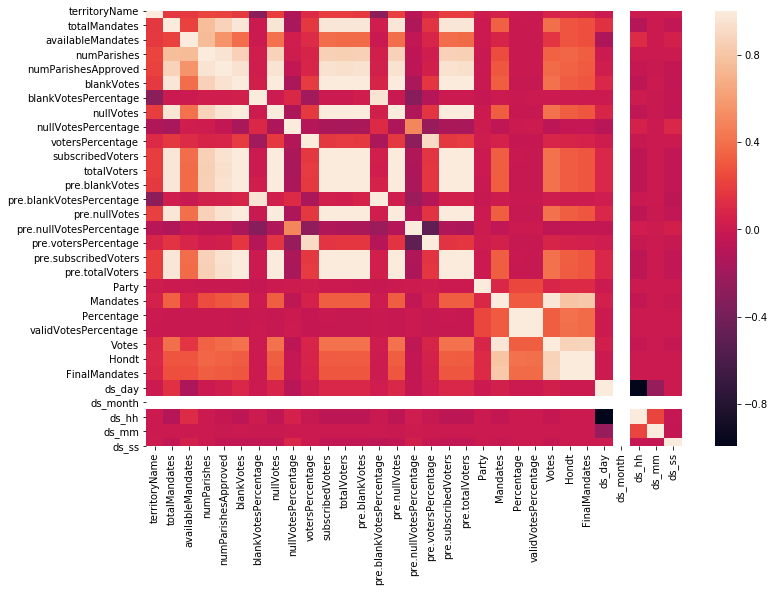

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(ds.corr())

As we have checked in heatmaps there is many correlated columns in dataframe.

In [32]:
#Dropping the ds_months which is highly correlated
ds.drop(['ds_month'],axis=1,inplace=True)

Removing outliers

In [33]:
ds_new=ds.copy()
z=np.abs(zscore(ds_new))
print(z.shape)
ds_new=ds_new.loc[(abs(z)<3).all(axis=1)]
print(ds_new.shape)

(21643, 30)
(18333, 30)


After removal of outliers we got actul 18333 rows. 3,310 outliers rows has been removed.

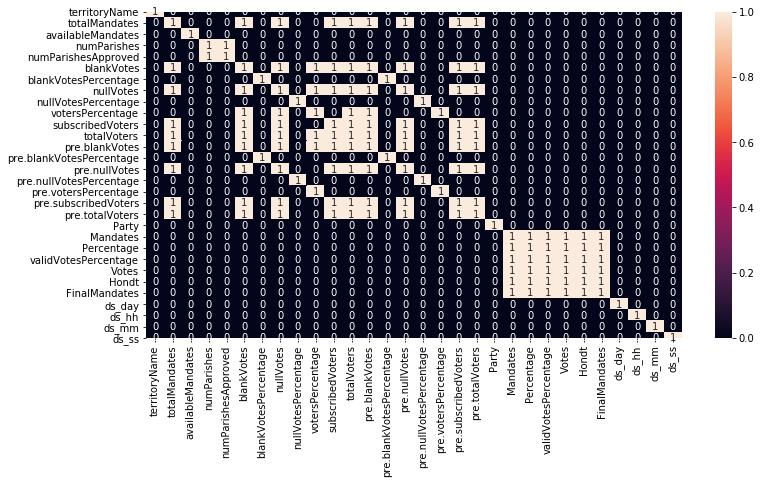

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(ds_new.corr()>0.5,annot=True)

There is many correlated columns need to separate while preparation the target data

In [36]:
x=ds_new.drop(['FinalMandates','Percentage', 'validVotesPercentage','blankVotesPercentage','nullVotesPercentage', 'votersPercentage','pre.blankVotesPercentage','pre.votersPercentage','Hondt'],axis=1)
print(x.shape)
y=ds_new['FinalMandates']
print(y.shape)

(18333, 21)
(18333,)


separate input and output data for Regression models

In [37]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.7413557 , -0.76728184,  0.97937878, ...,  0.21254919,
        -1.01380875,  1.01644458],
       [-1.7413557 , -0.76728184,  0.97937878, ...,  0.21254919,
        -1.01380875,  1.01644458],
       [-1.7413557 , -0.76728184,  0.97937878, ...,  0.21254919,
        -1.01380875,  1.01644458],
       ...,
       [ 1.50873516,  0.22949065, -0.59006709, ..., -2.35188931,
         0.48800574, -0.98382147],
       [ 1.50873516,  0.22949065, -0.59006709, ..., -2.35188931,
         0.48800574, -0.98382147],
       [ 1.50873516,  0.22949065, -0.59006709, ..., -2.35188931,
         0.48800574, -0.98382147]])

Scaled input data for model

In [39]:
def maxr2_score(rg,x,y):
    max_r_score =0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        rg.fit(x_train,y_train)
        pred=rg.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corrasponding to ',final_r_state,'is',max_r_score)
    return final_r_state

Created function for finding the max r2 score value of model

# Applying different algorithms to create model

In [40]:
lg=LinearRegression()
r_state=maxr2_score(lg,x,y)
print('Mean r2 score for linear Regression:',cross_val_score(lg,x,y,cv=5,scoring='r2').mean())
print('stander deviation in r2 score for linear Regression',cross_val_score(lg,x,y,cv=5,scoring='r2').std())

max r2 score corrasponding to  79 is 0.796055580274664
Mean r2 score for linear Regression: 0.7089670146163636
stander deviation in r2 score for linear Regression 0.26586286191607117


In [41]:
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 1}

In [42]:
knr=KNeighborsRegressor(n_neighbors=1)
r_state=maxr2_score(knr,x,y)
print('Mean r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('stander deviation r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

max r2 score corrasponding to  79 is 0.7624921527446543
Mean r2 score for KNN Regression: 0.796958340040391
stander deviation r2 score for KNN Regression: 0.3334313495861913


In [43]:
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [44]:
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)
print('Mean r2 score for Lasso Regression',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('stander deviation in r2 score for Lasso Regression',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

max r2 score corrasponding to  79 is 0.7980577387321808
Mean r2 score for Lasso Regression 0.7218277673629082
stander deviation in r2 score for Lasso Regression 0.2746375814061987


In [45]:
gb=GradientBoostingRegressor()
r_state=maxr2_score(gb,x,y)
print('Mean r2 score for ada Boosting Regration:',cross_val_score(gb,x,y,cv=5,scoring='r2').mean())
print('Mean r2 score for ada Boosting Regration:',cross_val_score(gb,x,y,cv=5,scoring='r2').std())

max r2 score corrasponding to  89 is 0.9827506427226127
Mean r2 score for ada Boosting Regration: 0.7851635278922072
Mean r2 score for ada Boosting Regration: 0.2799868573022461


In [46]:
ada_reg =AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 100}

In [47]:
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=500)
r_state=maxr2_score(ada_reg,x,y)
print('Mean r2 score for ada Boosting Regration:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Mean r2 score for ada Boosting Regration:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

max r2 score corrasponding to  42 is 1.0
Mean r2 score for ada Boosting Regration: 0.832848025780714
Mean r2 score for ada Boosting Regration: 0.3257471834615517


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
ada_reg.fit(x_train,y_train)
ada_pred=ada_reg.predict(x_test)
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,ada_pred)))
print('MAE is: ',mean_absolute_error(y_test,ada_pred))
print('r2_score is:',r2_score(y_test,ada_pred))
print('cross val score Mean:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('cross val score STD:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())
print('\n')
print(ada_pred)
print(y_test)

RMSE is:  0.016513705870960113
MAE is:  0.0002727024815925825
r2_score is: 0.9998554806111101
cross val score Mean: 0.835994452587651
cross val score STD: 0.31847402754437426


[0. 0. 0. ... 0. 1. 4.]
9751     0
1635     0
10131    0
17385    0
7408     0
        ..
16775    0
13459    0
20166    0
16696    1
2509     4
Name: FinalMandates, Length: 3667, dtype: int64


AdaBoostRegressor model learning rate is better than other models because it has less mean squared error.

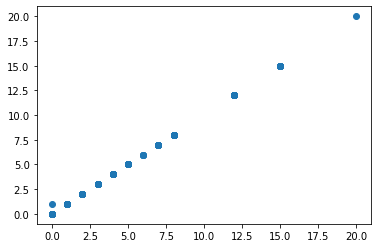

In [49]:
plt.scatter(ada_pred,y_test)

We have used scatter plot to analyse the test target data and predicted data comparatively.

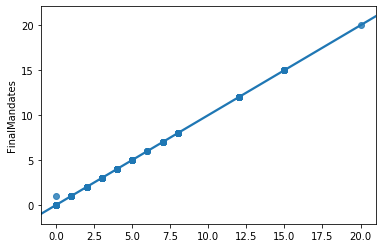

In [51]:
sns.regplot(ada_pred,y_test)

In [50]:
#saving model
joblib.dump(ada_reg,'Real-time_Election_Results_ada.obj')

['Real-time_Election_Results_ada.obj']

# Conclusion:

Depending upon the different features that were used as the inputs to the machine learning to predict the final number of elected MP's results of the 2019 Portuguese Parliamentary Election.We have used the EDA process to find out the correlated columns, data processing and data manipulation. And later we have used the different algorithms like linear regression, KNeighborsRegressor, LASSO ,AdaBoostRegressor,GradientBoostingRegressor. Further, we have used the GridSearchCV parameter to get the best result for the algorithm. 

After using all the above approaches we have concluded that AdaBoostRegressor model provides the highest level of accuracy for machine learning i.e., approx... 99%.